## Notebook focused in visualizing, studying and understanding the data 
### Author: Danilo Filippo

Dataset available at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Dataset documentation: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Read the data
train = pd.read_csv("../data/train.csv", index_col="Id")
target_column = 'SalePrice'
print("shape: " + str(train.shape))
print("features: " + str(train.columns))
train.head()

shape: (1460, 80)
features: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCon

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



For starters, when reading the dataset documentation, there were 5 samples identified as outliers, which may hinder the performance of any models. These outliers can be identified by a scatterplot between the Sale Price and the Grade Living Area. 

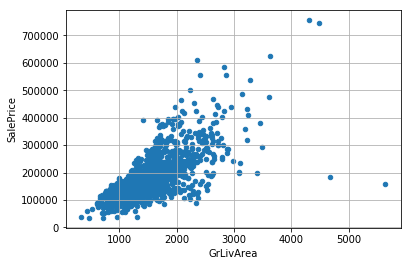

In [16]:
train.plot.scatter(x = 'GrLivArea', y = target_column, grid = True)

The scatter plot shows a high correlation between the Grade Living Area and the Sale Price. We can se two outliers samples where the Sale Price is relatively low even though the Area is specially large, and two more were the Area and the Sale Price are much higher than the rest of the dataset. We remove these outliers by filtering any sample where the GrLivArea is greater than 4000 sqft. The fifth outlier probably lies in the test set, so there is nothing to do about that sample.

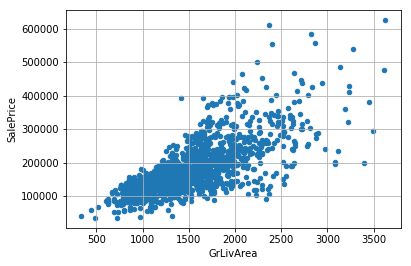

In [19]:
train = train[(train['GrLivArea'] < 4000)]
train.plot.scatter(x = 'GrLivArea', y = target_column, grid = True)